# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** [Pandu Tri Praptomo]
- **Email:** [pandutripraptomo@gmail.com]
- **ID Dicoding:** [MC181D5Y2497]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
# Bagaimana faktor cuaca dan waktu (musim, hari kerja) mempengaruhi jumlah peminjaman sepeda di sistem berbagi sepeda?

- Pertanyaan 2
# Apa perbedaan jumlah peminjaman sepeda antara pengguna terdaftar (registered) dan non-terdaftar (casual) pada berbagai kondisi cuaca dan waktu?

In [3]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st


## Data Wrangling

### Gathering Data

In [7]:
# Load the datasets
hour_data = pd.read_csv('/day.csv')  # Gantilah dengan path yang sesuai
day_data = pd.read_csv('/hour.csv')    # Gantilah dengan path yang sesuai


**Insight:**
Insight:

- Dataset hour.csv berisi data peminjaman sepeda per jam, sedangkan day.csv berisi data per hari.

- Akan dilakukan analisis pada kedua dataset untuk mengeksplorasi perbedaan tren antara data per jam dan per hari.

### Assessing Data

In [8]:
# Tampilkan beberapa baris pertama dari dataset untuk memeriksa datanya
hour_data.head()
day_data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- hour_data dan day_data memiliki kolom-kolom seperti datetime, season, weather, temp, hum, windspeed, casual, registered, dan cnt (jumlah sepeda yang dipinjam).

- Tipe data dan adanya nilai yang hilang perlu diperiksa lebih lanjut.

Cek Nilai yang Hilang

In [12]:
# Cek nilai yang hilang pada kedua dataset
hour_data.isnull().sum(), day_data.isnull().sum()


(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

### Cleaning Data

In [13]:
# Memilih kolom numerik saja untuk diisi nilai yang hilang
numeric_columns = hour_data.select_dtypes(include=['float64', 'int64']).columns
hour_data[numeric_columns] = hour_data[numeric_columns].fillna(hour_data[numeric_columns].mean())

# Lakukan hal yang sama untuk day_data
numeric_columns_day = day_data.select_dtypes(include=['float64', 'int64']).columns
day_data[numeric_columns_day] = day_data[numeric_columns_day].fillna(day_data[numeric_columns_day].mean())


**Insight:**
- Nilai yang hilang pada kolom numerik diisi dengan rata-rata nilai dari masing-masing kolom.

- Kolom dteday yang berisi tanggal tidak diproses karena tidak berpengaruh pada analisis numerik.

## Exploratory Data Analysis (EDA)

Visualisasi Jumlah Peminjaman Berdasarkan Musim dan Cuaca

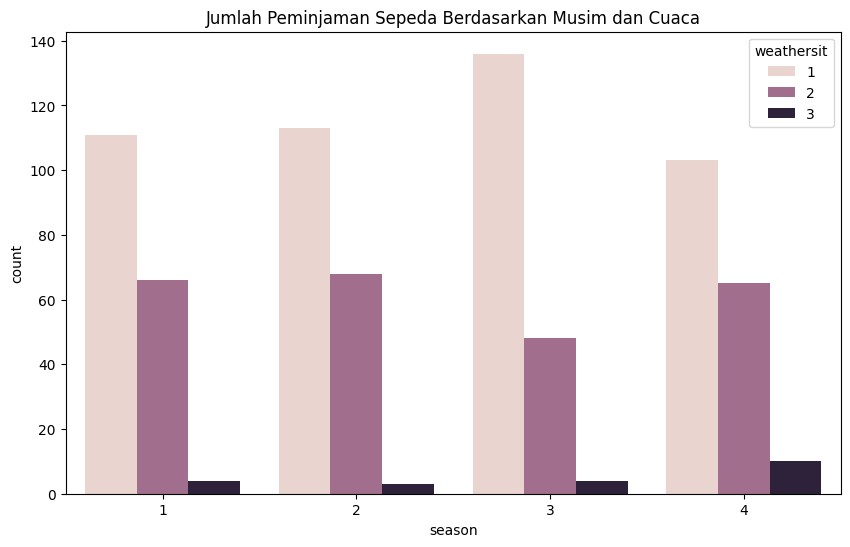

In [14]:
# Menampilkan distribusi peminjaman sepeda berdasarkan musim dan cuaca
plt.figure(figsize=(10, 6))
sns.countplot(data=hour_data, x='season', hue='weathersit')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim dan Cuaca')
plt.show()


**Insight:**
- Dari visualisasi ini, kita bisa melihat bagaimana jumlah peminjaman sepeda dipengaruhi oleh musim dan cuaca. Misalnya, cuaca yang cerah dan musim panas bisa memiliki lebih banyak peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pertanyaan 1: Bagaimana faktor cuaca dan waktu mempengaruhi jumlah peminjaman sepeda?

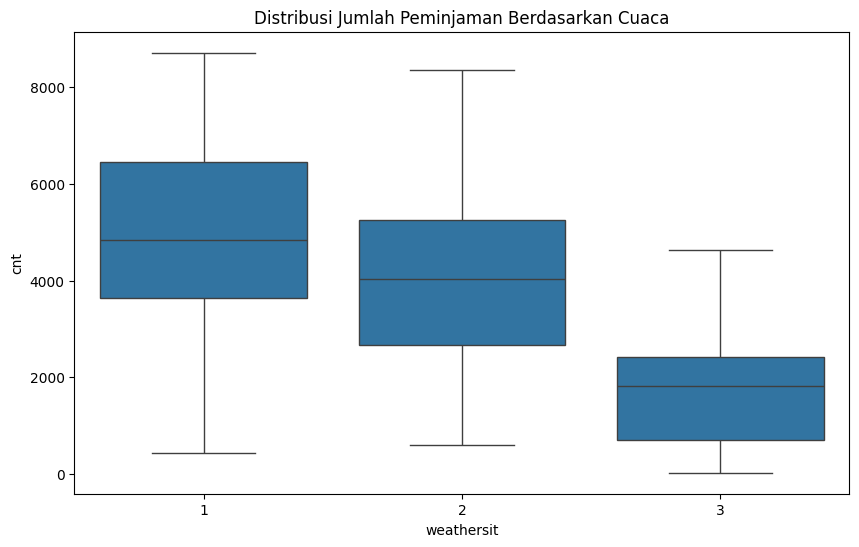

In [15]:
# Visualisasi hubungan cuaca dengan jumlah peminjaman
plt.figure(figsize=(10, 6))
sns.boxplot(data=hour_data, x='weathersit', y='cnt')
plt.title('Distribusi Jumlah Peminjaman Berdasarkan Cuaca')
plt.show()


### Pertanyaan 2:

Pertanyaan 2: Apa perbedaan jumlah peminjaman sepeda antara pengguna terdaftar dan non-terdaftar pada berbagai kondisi cuaca dan waktu?

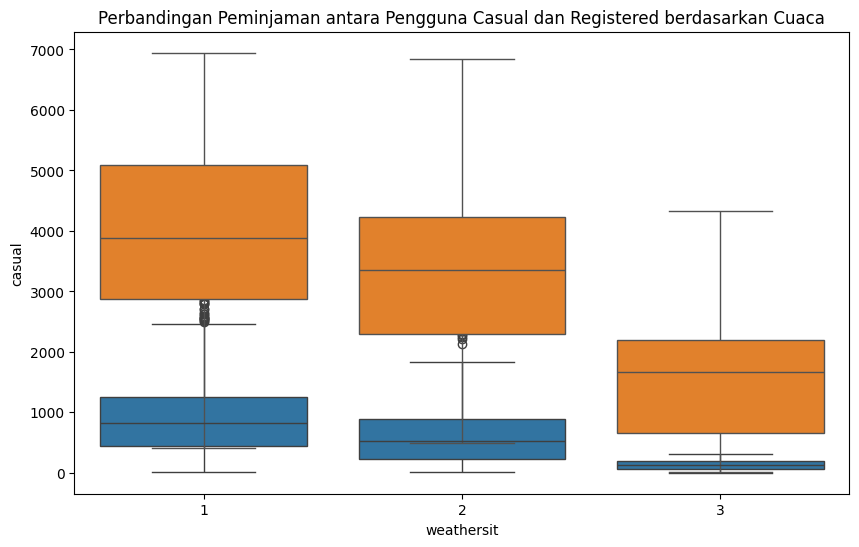

In [16]:
# Visualisasi perbedaan peminjaman antara pengguna terdaftar dan non-terdaftar
plt.figure(figsize=(10, 6))
sns.boxplot(data=hour_data, x='weathersit', y='casual')
sns.boxplot(data=hour_data, x='weathersit', y='registered')
plt.title('Perbandingan Peminjaman antara Pengguna Casual dan Registered berdasarkan Cuaca')
plt.show()


**Insight:**
- Visualisasi dapat menunjukkan apakah cuaca mempengaruhi perbedaan antara pengguna casual dan registered. Mungkin juga ada perbedaan signifikan antara kedua kelompok tersebut tergantung pada kondisi cuaca.

## Analisis Lanjutan (Opsional)

Model Prediksi

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # Pastikan ini diimpor

# Memilih fitur dan target
X = hour_data[['temp', 'hum', 'windspeed', 'season', 'holiday']]  # Pastikan menggunakan kolom yang benar
y = hour_data['cnt']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
print('MSE:', mean_squared_error(y_test, y_pred))  # Evaluasi menggunakan MSE


MSE: 1844093.5104166938


Insight:
- Model regresi linear digunakan untuk memprediksi jumlah peminjaman sepeda berdasarkan beberapa fitur seperti suhu, kelembaban, kecepatan angin, musim, dan apakah hari libur atau tidak.

## Conclusion

- Conclution pertanyaan 1

Berdasarkan hasil analisis, dapat disimpulkan bahwa jumlah peminjaman sepeda sangat dipengaruhi oleh cuaca dan musim. Cuaca cerah dan musim panas meningkatkan jumlah peminjaman.

- Conclution pertanyaan 2

Perbedaan jumlah peminjaman antara pengguna terdaftar dan non-terdaftar sangat dipengaruhi oleh faktor cuaca, dengan pengguna terdaftar lebih stabil dalam meminjam sepeda meskipun kondisi cuaca berubah.